# Loan Interest Prediction

### Author: Mia Song

##### Meta Data

X1	Interest Rate on the loan
X2	A unique id for the loan.
X3	A unique id assigned for the borrower.
X4	Loan amount requested
X5	Loan amount funded
X6	Investor-funded portion of loan
X7	Number of payments (36 or 60)
X8	Loan grade
X9	Loan subgrade
X10	Employer or job title (self-filled)
X11	Number of years employed (0 to 10; 10 = 10 or more)
X12	Home ownership status: RENT, OWN, MORTGAGE, OTHER.
X13	Annual income of borrower
X14	Income verified, not verified, or income source was verified
X15	Date loan was issued
X16	Reason for loan provided by borrower
X17	Loan category, as provided by borrower
X18	Loan title, as provided by borrower
X19	First 3 numbers of zip code
X20	State of borrower
X21	A ratio calculated using the borrower‰Ûªs total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower‰Ûªs self-reported monthly income.
X22	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
X23	Date the borrower's earliest reported credit line was opened
X24	Number of inquiries by creditors during the past 6 months.
X25	Number of months since the borrower's last delinquency.
X26	Number of months since the last public record.
X27	Number of open credit lines in the borrower's credit file.
X28	Number of derogatory public records
X29	Total credit revolving balance
X30	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
X31	The total number of credit lines currently in the borrower's credit file
X32	The initial listing status of the loan. Possible values are ‰ÛÒ W, F

### Step 1:
Clean and prepare your data: There are several entries where values have been deleted to simulate dirty data. Please clean the data with whatever method(s) you believe is best/most suitable. Note that some of the missing values are truly blank (unknown answers) and thus may be impossible to clean; use your discretion.

1. Import necessary libraries and pakcages 
2. Import data set and change column numes accordingly based on meta data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import chi2_contingency
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [2]:
df_raw = pd.read_csv('Data for Cleaning & Modeling.csv')

/var/folders/zt/7p4x8_1d2wdgdv8_dqk8gg080000gn/T/ipykernel_62552/695930546.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('Data for Cleaning & Modeling.csv')


In [3]:
# -1. Apply to the testing data set 
column_names = ['interest_rate', 'id_loan', 'id_borrower', 'loan_requested', 'loan_funded', 'loan_investor', 
                'due', 'loan_grade', 'loan_subgrade', 'job_title', 'tenure', 'home_ownership', 'income_annual', 
                'income_verified', 'loan_date', 'loan_reason', 'loan_category', 'loan_title', 'zip', 'state', 
                'debt_to_income', 'past_due_number', 'credit_open_date', 'inquiry', 'past_due_after', 
                'past_due_pr_after', 'credit_open_number', 'pr_number', 'revolving', 'revolving_rate', 
                'credit_all_number', 'loan_status']
df_raw.columns = column_names
df_raw.columns

Index(['interest_rate', 'id_loan', 'id_borrower', 'loan_requested',
       'loan_funded', 'loan_investor', 'due', 'loan_grade', 'loan_subgrade',
       'job_title', 'tenure', 'home_ownership', 'income_annual',
       'income_verified', 'loan_date', 'loan_reason', 'loan_category',
       'loan_title', 'zip', 'state', 'debt_to_income', 'past_due_number',
       'credit_open_date', 'inquiry', 'past_due_after', 'past_due_pr_after',
       'credit_open_number', 'pr_number', 'revolving', 'revolving_rate',
       'credit_all_number', 'loan_status'],
      dtype='object')

In [4]:
df = df_raw.copy()

3. Broadly understand the original data set using .info() and .describe() and .isnull().sum()
- Beacause the data set has mixed types of data, .describe(inclue = 'all') was used

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   interest_rate       338990 non-null  object 
 1   id_loan             399999 non-null  float64
 2   id_borrower         399999 non-null  float64
 3   loan_requested      399999 non-null  object 
 4   loan_funded         399999 non-null  object 
 5   loan_investor       399999 non-null  object 
 6   due                 399999 non-null  object 
 7   loan_grade          338730 non-null  object 
 8   loan_subgrade       338730 non-null  object 
 9   job_title           376014 non-null  object 
 10  tenure              382462 non-null  object 
 11  home_ownership      338639 non-null  object 
 12  income_annual       338972 non-null  float64
 13  income_verified     399999 non-null  object 
 14  loan_date           399999 non-null  object 
 15  loan_reason         123560 non-nul

In [6]:
df.describe(include = 'all')

,interest_rate,id_loan,id_borrower,loan_requested,loan_funded,loan_investor,due,loan_grade,loan_subgrade,job_title,...,credit_open_date,inquiry,past_due_after,past_due_pr_after,credit_open_number,pr_number,revolving,revolving_rate,credit_all_number,loan_status
count,338990,3.999990e+05,3.999990e+05,399999,399999,399999,399999,338730,338730,376014,...,399999,399999.000000,181198.000000,51155.000000,399999.000000,399999.000000,3.999990e+05,399733,399999.000000,399999
unique,482,NaN,NaN,1339,1342,7036,2,7,35,187821,...,660,NaN,NaN,NaN,NaN,NaN,NaN,1231,NaN,2
top,10.99%,NaN,NaN,"$10,000","$10,000","$10,000",36 months,B,B3,Teacher,...,Oct-00,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,f
freq,11082,NaN,NaN,28417,28324,24319,292369,101668,24009,4222,...,3225,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN,274313
mean,NaN,9.984493e+06,1.133899e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.817155,34.312117,76.320399,11.117953,0.152285,1.595605e+04,NaN,24.983010,NaN
std,NaN,7.928778e+06,8.663918e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.058746,21.787313,29.804509,4.898569,0.497389,1.952811e+04,NaN,11.473478,NaN
min,NaN,5.473400e+04,7.069900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,2.000000,NaN
25%,NaN,3.151742e+06,3.727712e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,16.000000,54.000000,8.000000,0.000000,6.453000e+03,NaN,17.000000,NaN
50%,NaN,8.234778e+06,9.667699e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,31.000000,80.000000,10.000000,0.000000,1.177800e+04,NaN,23.000000,NaN
75%,NaN,1.532960e+07,1.731219e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,50.000000,103.000000,14.000000,0.000000,2.020900e+04,NaN,32.000000,NaN


In [7]:
df_null = pd.DataFrame(df.isnull().sum())
df_null_ratio = pd.DataFrame(df.isnull().sum() / len(df) * 100)

df_null_report = pd.concat([df_null, df_null_ratio], axis = 1)
df_null_report.columns = ['null_values(#)', 'null_ratio(%)']
df_null_report.sort_values(by = 'null_values(#)', ascending = False, inplace = True)

df_null_report

,null_values(#),null_ratio(%)
past_due_pr_after,348845,87.21125
loan_reason,276440,69.11000
past_due_after,218802,54.70050
home_ownership,61361,15.34025
loan_grade,61270,15.31750
loan_subgrade,61270,15.31750
income_annual,61028,15.25700
interest_rate,61010,15.25250
job_title,23986,5.99650
tenure,17538,4.38450


5. Remove null values

5.1. Just drop the insignificant null valeus for analysis
- Features conain with one missing value in total
- The influence is insignificant, so just drop the null value
- However, we will also drop null from interest_rate(Interest Rate on the loan). This is y variable in our supervised learning, so cannot be null

In [8]:
# 0. Apply to the testing data set 
df = df.dropna(subset = ['interest_rate', 'debt_to_income', 'credit_open_number', 'pr_number', 'revolving', 'credit_all_number', 
                      'inquiry', 'credit_open_date', 'credit_open_date', 'past_due_number', 'loan_category',
                      'state', 'zip', 'id_loan', 'loan_date', 'income_verified', 'due', 'loan_investor',
                      'loan_funded', 'loan_requested', 'id_borrower', 'loan_status'])

In [9]:
df_null = pd.DataFrame(df.isnull().sum())
df_null_ratio = pd.DataFrame(df.isnull().sum() / len(df) * 100)

df_null_report = pd.concat([df_null, df_null_ratio], axis = 1)
df_null_report.columns = ['null_values(#)', 'null_ratio(%)']
df_null_report.sort_values(by = 'null_values(#)', ascending = False, inplace = True)

df_null_report

,null_values(#),null_ratio(%)
past_due_pr_after,295589,87.197225
loan_reason,233933,69.009024
past_due_after,185456,54.708560
home_ownership,51959,15.327636
loan_grade,51866,15.300201
loan_subgrade,51866,15.300201
income_annual,51751,15.266277
job_title,20256,5.975415
tenure,14794,4.364153
revolving_rate,224,0.066079


5.2. Drop columns with a too large portion of null values (>50%)

In [10]:
# 1. Apply to the testing data set 
# For a better analysis, we could apply NLP to loan_reason, but we will drop it for now.

cols = ['past_due_pr_after', 'loan_reason', 'past_due_after']

df = df.drop(cols, axis = 1)
len(df.columns)

29

5.3.1. Features with speical care to deal with null values

- home_ownership	51959	15.327636
- loan_grade	51866	15.300201
- loan_subgrade	51866	15.300201
- income_annual	51751	15.266277
- job_title	20256	5.975415
- tenure	14794	4.364153
- revolving_rate	224	0.066079
- loan_title	16	0.004720

5.3.2. Null value management tips from ChatGPT

- Imputation: You can impute the missing values in the feature using various statistical methods, such as mean imputation, median imputation, or multiple imputation. This option can be reasonable if the missing values are missing at random and the imputed values are likely to be similar to the true values.
- Exclusion: Another option is to simply exclude the feature from your analysis, especially if the feature is not critical to your analysis and removing it will not greatly impact your results.
- Model-based imputation: You could also use predictive modeling to impute the missing values in the feature based on the values of other features in your dataset. For example, you could build a regression model to predict the missing values based on the values of other features. This option can be reasonable if you have a good understanding of the relationships between the features in your dataset.
- Interpolation: If the missing values are missing at random, you can also use interpolation methods to impute the missing values based on the values of the nearby observations. This option is particularly useful for time-series data, where you can use the values of previous or subsequent observations to impute the missing values.

5.3. Take a look at each column and examine values. Perform necessary transformation to increase prediction power.

In [11]:
pd.options.display.max_columns = None
df.head()

,interest_rate,id_loan,id_borrower,loan_requested,loan_funded,loan_investor,due,loan_grade,loan_subgrade,job_title,tenure,home_ownership,income_annual,income_verified,loan_date,loan_category,loan_title,zip,state,debt_to_income,past_due_number,credit_open_date,inquiry,credit_open_number,pr_number,revolving,revolving_rate,credit_all_number,loan_status
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,< 1 year,RENT,85000.0,VERIFIED - income,Aug-09,debt_consolidation,Debt consolidation for on-time payer,941xx,CA,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,< 1 year,RENT,65000.0,not verified,May-08,credit_card,Credit Card payoff,112xx,NY,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,1 year,RENT,70000.0,VERIFIED - income,Aug-14,debt_consolidation,mlue,100xx,NY,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,10+ years,OWN,54000.0,not verified,Mar-10,debt_consolidation,zxcvb,777xx,TX,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,6 years,RENT,32000.0,not verified,Nov-09,debt_consolidation,Nicolechr1978,067xx,CT,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.60%,40.0,f


- id_loan and id_borrower are surrogate keys and they have no predicting power: we will drop them

In [12]:
# 2. Apply to the testing data set 

cols = ['id_loan', 'id_borrower']
df = df.drop(cols, axis = 1)
len(df.columns)

27

- 'loan_requested', 'loan_funded', 'loan_investor' contain unnecessary sings($ and ,) so we will remove them
- The current dtype is object and we will change it into float 

In [13]:
# 3. Apply to the testing data set 

cols = ['loan_requested', 'loan_funded', 'loan_investor']

df[cols] = df[cols].astype(str)
df[cols] = df[cols].applymap(lambda x: x.replace('$', '').replace(',', ''))
df[cols] = df[cols].astype(float)

df[cols].head()

,loan_requested,loan_funded,loan_investor
0,25000.0,25000.0,19080.0
1,7000.0,7000.0,673.0
2,25000.0,25000.0,24725.0
3,1200.0,1200.0,1200.0
4,10800.0,10800.0,10692.0


- Using the same method above, remove % sign and change the data type into float

In [14]:
# 4. Apply to the testing data set 

cols = ['revolving_rate', 'interest_rate']

df[cols] = df[cols].astype(str)
df[cols] = df[cols].applymap(lambda x: x.replace('%', ''))
df[cols] = df[cols].astype(float)

df[cols].head()

,revolving_rate,interest_rate
0,52.1,11.89
1,76.7,10.71
2,66.3,16.99
3,40.4,13.11
4,25.6,13.57


- feature: 'loan_grade' has 7 values and null values should be filled under the 7 values.
- feature: 'loan_subgrade' is a subcategory for 'loan_grade'. The detail is hard to infer and it will increase model's complexity significantly, so we will drop the column

In [15]:
df['loan_grade'].unique()

array(['B', 'D', 'C', 'A', 'E', 'F', nan, 'G'], dtype=object)

In [16]:
df['loan_subgrade'].unique()

array(['B4', 'B5', 'D3', 'C2', 'C3', 'D4', 'B3', 'C5', 'A5', 'D2', 'B1',
       'C4', 'A4', 'A3', 'C1', 'E4', 'B2', 'A2', 'E2', 'E1', 'D1', 'F1',
       'F2', 'A1', 'F3', 'E5', 'D5', nan, 'E3', 'F4', 'G5', 'F5', 'G1',
       'G4', 'G3', 'G2'], dtype=object)

In [17]:
# 5. Apply to the testing data set 
df = df.drop('loan_subgrade', axis = 1)

- 'due' can be used as a categorical variable: due in 36 months(shorter) or 60 months(longer)
- change the text shorter and simpler for analytical convenience

In [18]:
df['due'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [19]:
# 6. Apply to the testing data set 
df['due'] = np.where(df['due'] == ' 36 months', '36M', '60M')

In [20]:
df['due'].unique()

array(['36M', '60M'], dtype=object)

- We drop feature:'job_title' because it's too complex to use as a categorical variable

In [21]:
len(df['job_title'].unique()) / len(df)

0.48200974072905023

In [22]:
# 7. Apply to the testing data set 
df = df.drop('job_title', axis = 1)
len(df.columns)

25

- For feature:'tenure', we will use a lower level of values for the analyis
- To do so, regroup 'tenure' with 5-year interval

In [23]:
df['tenure'].unique()

array(['< 1 year', '1 year', '10+ years', '6 years', '9 years', '3 years',
       '5 years', '2 years', '4 years', '8 years', '7 years', nan],
      dtype=object)

In [24]:
# 8. Apply to the testing data set 
bambino = ['< 1 year', '1 year', '2 years', '3 years', '4 years']
pro = ['5 years', '6 years', '7 years', '8 years', '9 years']
veteran = ['10+ years']

df['tenure_cat'] = np.where(df['tenure'].isin(bambino), '_5Y', np.where(df['tenure'].isin(pro), '5_9Y', '10Y_') )
df['tenure_cat'].unique()

array(['_5Y', '10Y_', '5_9Y'], dtype=object)

- Now, we will fill the null values according to the credit_card_open date
- We assumed that most of the borrowers opened their first credit line when being employed for the first time, which corrsponds to tenure

In [25]:
df['tenure'].isnull().sum()

14794

In [26]:
# 9. Apply to the testing data set 
df['credit_open_year'] = df['credit_open_date'].str[-2:]
df['credit_open_year'] = df['credit_open_year'].astype(int)
year_list = df['credit_open_year'].copy().to_list()

In [27]:
# 10. Apply to the testing data set 
year = []

for y in year_list:
    if y < 20:
        y = y + 2000
    else: 
        y = y + 1900
    year.append(y)

In [28]:
# 10. Apply to the testing data set 
# Be aware of overwriting problems 
df['credit_open_year'] = year
df['credit_open_year'] = df['credit_open_year'].astype(int)

In [29]:
# 11. Apply to the testing data set 
df = df.drop('credit_open_date', axis = 1)

In [30]:
df['credit_open_year'].describe()

count    338989.000000
mean       1997.174433
std           7.190159
min        1944.000000
25%        1994.000000
50%        1999.000000
75%        2002.000000
max        2011.000000
Name: credit_open_year, dtype: float64

- We assumed that the cuurent year as of 2013, because it's the maximum of loan_year and fill the nulls based on this assumption

In [31]:
# 12. Apply to the testing data set 
df.loc[df['tenure_cat'].isnull(), 'tenure_cat'] = np.where(df['credit_open_year'] >= 2009, '_5Y', np.where(df['credit_open_year'] >= 2003, '5_9Y', '10Y_'))

In [32]:
# 13. Apply to the testing data set 
df = df.drop('tenure', axis = 1)

- Fill na in the feature: 'home_ownership'
- Infter as much as possible using features with text: 'loan_category' and 'loan_title'

In [33]:
df['home_ownership'].isnull().sum()

51959

- First, we combine 'Other', 'ANY' into 'Other'

In [34]:
df['home_ownership'].value_counts(ascending = False)

MORTGAGE    145958
RENT        115958
OWN          24976
OTHER          107
NONE            30
ANY              1
Name: home_ownership, dtype: int64

In [35]:
# 14. Apply to the testing data set 
mask = (df['home_ownership'] == 'OTHER') | (df['home_ownership'] == 'NONE') | (df['home_ownership'] == 'ANY')

df['home_ownership'] = np.where(mask, 'OTHER', df['home_ownership'])
df['home_ownership'].value_counts(ascending = False)

MORTGAGE    145958
RENT        115958
OWN          24976
OTHER          138
Name: home_ownership, dtype: int64

In [36]:
df['loan_category'].unique()

array(['debt_consolidation', 'credit_card', 'car', 'home_improvement',
       'small_business', 'major_purchase', 'other', 'house', 'vacation',
       'educational', 'moving', 'wedding', 'medical', 'renewable_energy'],
      dtype=object)

- It could be either 'MORTGAGE' or 'OWN'
- We do not combine the cateogry because those can influence on interest rate. 
- Considering it takes average 22 year to pay back mortgage, we assume these variables would be more likely 'MORTGAGE'

In [37]:
# 15. Apply to the testing data set 
mask = df['home_ownership'].isnull() & ((df['loan_category'] == 'house') | (df['loan_category'] == 'major_purchase') | (df['loan_category'] == 'home_improvement') | (df['loan_category'] == 'renewable_energy') )
df['home_ownership'] = np.where(mask, 'MORTGAGE', df['home_ownership'])
df['home_ownership'].isnull().sum() / len(df)

0.14019038965866149

In [38]:
# 16. Apply to the testing data set 
mask = df['home_ownership'].isnull() & ((df['loan_category'] == 'moving') | (df['loan_category'] == 'wedding'))

df['home_ownership'] = np.where(mask, 'RENT', df['home_ownership'])
df['home_ownership'].isnull().sum() / len(df)

0.13836437170527657

In [39]:
# 17. Apply to the testing data set

mask = df['home_ownership'].isnull() & df['loan_title'].str.contains('house' or 'home imporvement' or 'mortgage')
# Later, we can add more words to filtr if necessary 

df['home_ownership'] = np.where(mask, 'MORTGAGE', df['home_ownership'])
df['home_ownership'].isnull().sum() / len(df)

0.13827882320665272

In [40]:
# 18. Apply to the testing data set

mask = df['home_ownership'].isnull() & df['loan_title'].str.contains('moving' or 'wedding' or 'rental')
# Later, we can add more words to filtr if necessary 

df['home_ownership'] = np.where(mask, 'RENT', df['home_ownership'])
df['home_ownership'].isnull().sum() / len(df)

0.13824637377614024

In [41]:
# 19. Apply to the testing data set

df = df.drop('loan_title', axis = 1)

- We faced limitation to fill the null in the 'home_ownerhip' feature and further steps are necessary.

- Simplify text values in the feature:'income_verified' to use it as a categorical variable

In [42]:
df['income_verified'].unique()

array(['VERIFIED - income', 'not verified', 'VERIFIED - income source'],
      dtype=object)

In [43]:
# 20. Apply to the testing data set
df['income_verified'] = np.where(df['income_verified'] == 'VERIFIED - income', 'Income', np.where(df['income_verified'] == 'VERIFIED - income source', 'Source', 'No'))

In [44]:
df['income_verified'].unique()

array(['Income', 'No', 'Source'], dtype=object)

- loan_date might be reaplced with the year the loan was accepted
- then, the original column will be removed to reduce duplicity and we will not use month for analysis

In [45]:
# 21. Apply to the testing data set
df['loan_year'] = df['loan_date'].str[-2:]
df['loan_year'] = '20' + df['loan_year']
df['loan_year'] = df['loan_year'].astype(int)

In [46]:
# 22. Apply to the testing data set
df = df.drop('loan_date', axis = 1)
len(df.columns)

24

In [47]:
df['loan_year'].unique()

array([2009, 2008, 2014, 2010, 2012, 2007, 2011, 2013])

- zip codes are unique across the US and can be a useful predictor
- However, feature:'zip' is a categorical variables and there are around 900 unique values 
- To use this variable, more in-depth data manipulation will be necessary 
- Therefore, it'd better to use state insted

In [48]:
len(df['zip'].unique())

874

In [49]:
# 23. Apply to the testing data set
df = df.drop('zip', axis = 1)
len(df.columns)

23

- However, too many levels exist even in feature: 'state'.
- We divide them into 5 regions that have geographical aproximity, instead.

In [50]:
# 23. Apply to the testing data set
Northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ']
Mid_Atlantic = ['PA', 'DE', 'MD', 'VA', 'WV', 'DC']
South = ['KY', 'TN', 'NC', 'SC', 'GA', 'AL', 'FL', 'MS', 'AR', 'LA', 'TX']
Midwest = ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
West = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'OR', 'WA', 'CA', 'AK', 'HI']
state = df['state'].to_list()
regions = []

for state_ in state: 
    if state_ in Northeast:
        regions.append('Northeast')
    elif state_ in Mid_Atlantic:
        regions.append('Mid_Atlantic')
    elif state_ in South:
        regions.append('South')
    elif state_ in Midwest:
        regions.append('Midwest')
    else:
        regions.append('West')
        
df['region'] = regions
df['region'].unique()

array(['West', 'Northeast', 'South', 'Mid_Atlantic', 'Midwest'],
      dtype=object)

In [51]:
# 24. Apply to the testing data set
df = df.drop('state', axis = 1)
len(df.columns)

23

- A borrower with zero revolving amount has 0% revolving rate. 

In [52]:
# 25. Apply to the testing data set
# df[df['revolving_rate'].isnull()]['revolving'].value_counts(ascending = False)
df['revolving_rate'] = np.where(df['revolving'] == 0.0, 0.0, df['revolving_rate'])

- Fill the nulls in the feature: 'revolving_rate' 
- We can use either linear regression or .interpolate() because this feature is a numerical feature
- We will use linear regression and will use features that have strong relationship with revolving_rate

<AxesSubplot:>

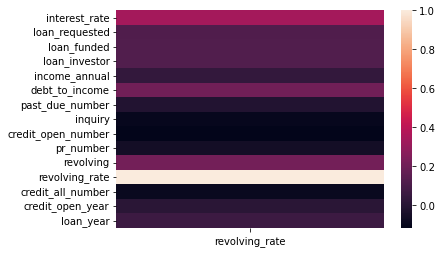

In [53]:
sns.heatmap(df.corr()[['revolving_rate']])

In [54]:
# 26. Apply to the testing data set
    
# Prepare the data by removing the rows with missing values in the target variable
df_without_missing = df.dropna(subset=['revolving_rate'])
X = df_without_missing[['loan_requested', 'loan_funded', 'loan_investor', 'debt_to_income']]
y = df_without_missing['revolving_rate']

# Train the model
reg = LinearRegression().fit(X, y)

# Make predictions for the missing values in the target variable
X_missing = df[df['revolving_rate'].isna()][['loan_requested', 'loan_funded', 'loan_investor', 'debt_to_income']]
y_missing = reg.predict(X_missing)

# Fill the missing values in the original data frame
df.loc[df['revolving_rate'].isna(), 'revolving_rate'] = y_missing

df['revolving_rate'].isnull().sum()

0

- This is the code when use .interpolate()

- Fill the nulls in the feature: 'income_annual' 
- We can use either linear regression or .interpolate() because this feature is a numerical feature
- We will use linear regression and will use features that have strong relationship with annual income

<AxesSubplot:>

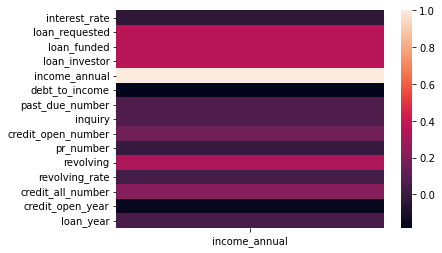

In [55]:
sns.heatmap(df.corr()[['income_annual']])

In [56]:
# 27. Apply to the testing data set

# Prepare the data by removing the rows with missing values in the target variable
df_without_missing = df.dropna(subset=['income_annual'])
X = df_without_missing[['loan_requested', 'loan_funded', 'loan_investor', 'debt_to_income']]
y = df_without_missing['income_annual']

# Train the model
reg = LinearRegression().fit(X, y)

# Make predictions for the missing values in the target variable
X_missing = df[df['income_annual'].isna()][['loan_requested', 'loan_funded', 'loan_investor', 'debt_to_income' ]]
y_missing = reg.predict(X_missing)

# Fill the missing values in the original data frame
df.loc[df['income_annual'].isna(), 'income_annual'] = y_missing

df['income_annual'].isnull().sum()

0

- Alternatively, we also can consider using .inperpolate() and this is the code

- Find imputation method on categorical variables other than .interpolate()
- Use K-means method due to high dimensionality

In [57]:
# 28. Apply to the testing data set
# One-hot encode the categorical features
df['home_ownership'].fillna('Unknown', inplace = True)
df['loan_grade'].fillna('Unknown', inplace = True)

df_encoded = pd.get_dummies(df, columns = ['due', 'loan_grade', 'home_ownership', 'income_verified', 'loan_category', 'loan_status', 'tenure_cat', 'region'], prefix = ['due', 'loan_grade', 'home_ownership', 'income_verified', 'loan_category', 'loan_status', 'tenure_cat', 'region'])
home_len = len(df['home_ownership'].unique())
loan_len = len(df['loan_grade'].unique())

In [58]:
# 29. Apply to the testing data set

# Split data into features and target variable
X = df_encoded.drop(['loan_grade_Unknown', 'home_ownership_Unknown'], axis = 1)
y = df_encoded['loan_grade_Unknown']

# Split data into training and test sets
train_X = X[y==0]
test_X = X[y==1]

# Fit the k-means model to the training data
kmeans = KMeans(n_clusters = loan_len, random_state = 0).fit(train_X)

# Predict the missing loan grade values
pred_loan_grades = kmeans.predict(test_X)

# Get the unique loan grades
loan_grades = df['loan_grade'].unique()

# Fill in the missing loan grade values in the original data
# Be aware of label-based indexing
# pred_loan_grades is likely an array or a list containing the predicted loan grades for the observations in the test set, where the loan grades are represented as integers (e.g., 0 for A, 1 for B, 2 for C, etc.). The line of code df['loan_grade'].unique()[i] is used to map these integers back to the original loan grade labels (e.g., 0 maps to A, 1 maps to B, 2 maps to C, etc.). So, the line of code df.loc[y==1, 'loan_grade'] = [df['loan_grade'].unique()[i] for i in pred_loan_grades] is assigning the predicted loan grades to the appropriate observations in the data frame, where the missing loan grades are represented by 1 in the y array.
# K-means method, the label appears as a number starting from 0
df.loc[y==1, 'loan_grade'] = [loan_grades[i] for i in pred_loan_grades]

/Users/misunsong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
# 30. Apply to the testing data set

# Split data into features and target variable
X = df_encoded.drop(['home_ownership_Unknown', 'loan_grade_Unknown'], axis = 1)
y = df_encoded['home_ownership_Unknown']

# Split data into training and test sets
train_X = X[y==0]
test_X = X[y==1]

# Fit the k-means model to the training data
kmeans = KMeans(n_clusters = home_len, random_state = 0).fit(train_X)

# Predict the missing loan grade values
pred_home_ownership = kmeans.predict(test_X)

# Get the unique loan grades
home_types = df['home_ownership'].unique()

# Fill in the missing loan grade values in the original data
# Be aware of label-based indexing
# pred_loan_grades is likely an array or a list containing the predicted loan grades for the observatio
df.loc[y==1, 'home_ownership'] = [home_types[i] for i in pred_home_ownership]

/Users/misunsong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [60]:
print(df['loan_grade'].isnull().sum())
print(df['home_ownership'].isnull().sum())

0
0


- Finally, 5. Remove null values is done

In [61]:
df_null = pd.DataFrame(df.isnull().sum())
df_null_ratio = pd.DataFrame(df.isnull().sum() / len(df) * 100)

df_null_report = pd.concat([df_null, df_null_ratio], axis = 1)
df_null_report.columns = ['null_values(#)', 'null_ratio(%)']
df_null_report.sort_values(by = 'null_values(#)', ascending = False, inplace = True)

df_null_report

,null_values(#),null_ratio(%)
interest_rate,0,0.0
inquiry,0,0.0
loan_year,0,0.0
credit_open_year,0,0.0
tenure_cat,0,0.0
loan_status,0,0.0
credit_all_number,0,0.0
revolving_rate,0,0.0
revolving,0,0.0
pr_number,0,0.0


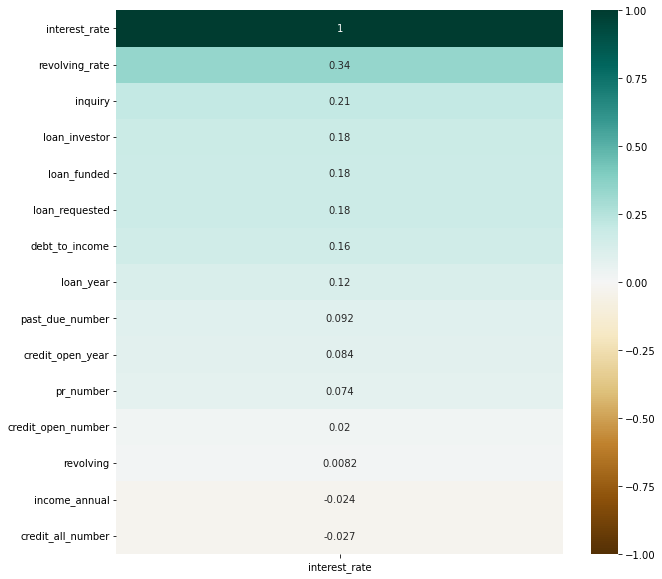

In [62]:
plt.figure(figsize=(10, 10))

sns.heatmap(df.corr()[['interest_rate']].sort_values(by='interest_rate', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

plt.show()

- Lastly, we removed outliers from several featrues that show relatively high correlation with interest rate if it does not significantly influence on the original data set
- The outliers from featrue: 'revolving_rate', feature: 'debt_to_income' were removed

/Users/misunsong/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


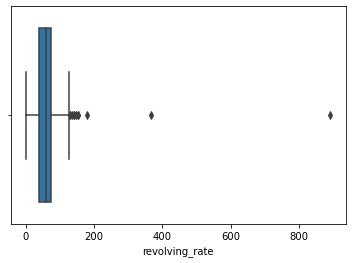

In [63]:
sns.boxplot(df['revolving_rate'])
plt.show()

In [64]:
pct25 = df['revolving_rate'].quantile(.25)
pct75 = df['revolving_rate'].quantile(.75)
iqr = pct75 - pct25

bottom = pct25 - 1.5*iqr
top = pct75 + 1.5*iqr

print(len(df[df['revolving_rate'] > top]))
print(len(df[df['revolving_rate'] < bottom]))

11
0


In [65]:
df['revolving_rate'] = np.where((df['revolving_rate'] > top), np.nan, df['revolving_rate'])
df = df.dropna(subset = ['revolving_rate'])

/Users/misunsong/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


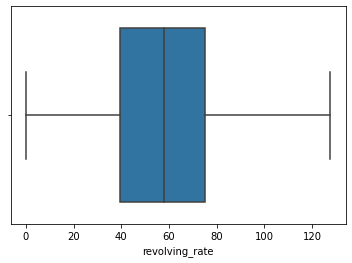

In [66]:
sns.boxplot(df['revolving_rate'])
plt.show()

/Users/misunsong/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


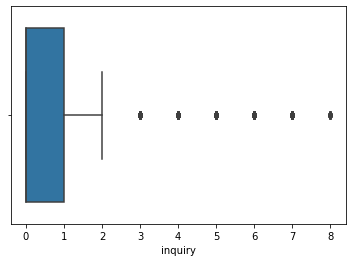

In [67]:
sns.boxplot(df['inquiry'])
plt.show()

In [68]:
pct25 = df['inquiry'].quantile(.25)
pct75 = df['inquiry'].quantile(.75)
iqr = pct75 - pct25

bottom = pct25 - 1.5*iqr
top = pct75 + 1.5*iqr

print(len(df[df['inquiry'] > top]))
print(len(df[df['inquiry'] < bottom]))

27546
0


/Users/misunsong/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


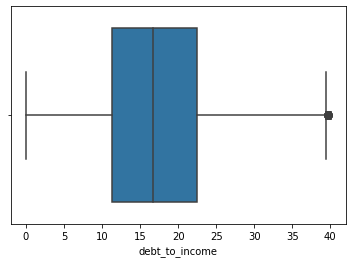

In [69]:
sns.boxplot(df['debt_to_income'])
plt.show()

In [70]:
pct25 = df['debt_to_income'].quantile(.25)
pct75 = df['debt_to_income'].quantile(.75)
iqr = pct75 - pct25

bottom = pct25 - 1.5*iqr
top = pct75 + 1.5*iqr

print(len(df[df['debt_to_income'] > top]))
print(len(df[df['debt_to_income'] < bottom]))

114
0


In [71]:
df['debt_to_income'] = np.where((df['debt_to_income'] > top), np.nan, df['debt_to_income'])
df = df.dropna(subset = ['debt_to_income'])

/Users/misunsong/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


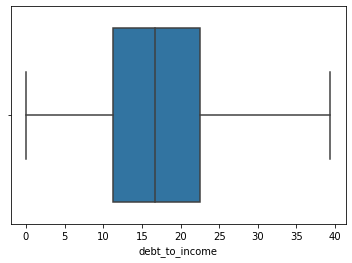

In [72]:
sns.boxplot(df['debt_to_income'])
plt.show()

- Finally, we have our data set for analysis with observations 338864, losing about 16% of the original data set

In [73]:
print(len(df))
print(len(df) / len(df_raw))

338864
0.84716


- Using Chi-suqared test, try to drop some undesirable feature that has p_value more than 0.05

In [74]:
def chi_squared_test(data, target_variable):
    p_values = []
    for variable in data.columns:
        if variable != target_variable:
            contingency_table = pd.crosstab(data[variable], data[target_variable])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            p_values.append((variable, p))
    p_values = sorted(p_values, key=lambda x: x[1])
    return p_values

In [75]:
p_values = chi_squared_test(df, 'interest_rate')
for variable, p_value in p_values:
    if p_value > 0.05:
        df = df.drop(variable, axis=1)

- One hot encode our finalized data set to prepare for analysis

In [76]:
df_train = df.copy()

In [77]:
df_train = pd.get_dummies(df, columns = ['due', 'loan_grade', 'home_ownership', 'income_verified', 'loan_category', 'loan_status', 'tenure_cat', 'region'], prefix = ['due', 'loan_grade', 'home_ownership', 'income_verified', 'loan_category', 'loan_status', 'tenure_cat', 'region'])
df_train

,interest_rate,loan_requested,loan_funded,loan_investor,past_due_number,inquiry,credit_open_number,pr_number,revolving,revolving_rate,credit_all_number,credit_open_year,loan_year,due_36M,due_60M,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_grade_Unknown,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,home_ownership_Unknown,income_verified_Income,income_verified_No,income_verified_Source,loan_category_car,loan_category_credit_card,loan_category_debt_consolidation,loan_category_educational,loan_category_home_improvement,loan_category_house,loan_category_major_purchase,loan_category_medical,loan_category_moving,loan_category_other,loan_category_renewable_energy,loan_category_small_business,loan_category_vacation,loan_category_wedding,loan_status_f,loan_status_w,tenure_cat_10Y_,tenure_cat_5_9Y,tenure_cat__5Y,region_Mid_Atlantic,region_Midwest,region_Northeast,region_South,region_West
0,11.89,25000.0,25000.0,19080.0,0.0,0.0,10.0,0.0,28854.0,52.1,42.0,1994,2009,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,10.71,7000.0,7000.0,673.0,0.0,0.0,7.0,0.0,33623.0,76.7,7.0,2000,2008,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
2,16.99,25000.0,25000.0,24725.0,0.0,0.0,10.0,0.0,19878.0,66.3,17.0,2000,2014,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,13.11,1200.0,1200.0,1200.0,0.0,0.0,5.0,0.0,2584.0,40.4,31.0,1985,2010,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
4,13.57,10800.0,10800.0,10692.0,0.0,1.0,14.0,0.0,3511.0,25.6,40.0,1996,2009,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,12.99,10000.0,10000.0,10000.0,0.0,0.0,9.0,0.0,10268.0,76.1,20.0,2003,2014,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
399996,16.29,13150.0,13150.0,13150.0,0.0,0.0,11.0,0.0,8931.0,37.8,21.0,2007,2014,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
399997,10.99,20000.0,20000.0,20000.0,0.0,0.0,14.0,0.0,28976.0,69.3,48.0,2004,2014,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
399998,17.57,18475.0,18475.0,18475.0,0.0,0.0,19.0,0.0,11982.0,39.0,31.0,1994,2014,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


### Step 2:
Build your models: Please build machine learning/statistical models in Python to predict the interest rate assigned to a loan. When writing the code associated with each model, please have the first part produce and save the model, followed by a second part that loads and applies the model.

- First, we divide the cleansed data set into X(=features) and y.

In [78]:
# Split the data into features and target
X = df_train.drop("interest_rate", axis=1)
y = df_train["interest_rate"]

- Because we have a relatively large and high dimensional data set even after data cleansing process, we will 1) normalize and 2) standardize our data. 
- 1) Normalization: Normalization is a scaling technique that transforms a data point to have a unit magnitude or length of 1. In normalization, we rescale a feature to a specific range, typically between 0 and 1, to bring all the features to the same magnitude. Normalization is particularly useful when the features have widely different ranges, and it helps to reduce the impact of outliers on the model.
- 2) Standardization: Standardization, on the other hand, transforms a feature to have a mean of 0 and a standard deviation of 1. In standardization, we subtract the mean of the feature from each value and divide the result by the standard deviation of the feature. This helps to bring the features to the same scale and eliminates the impact of different ranges.

In [79]:
normalizer = Normalizer()
X_norm = normalizer.fit_transform(X)

scaler = StandardScaler()
X_standard = scaler.fit_transform(X_norm)

- Perform PCA to reduce dimension???
- After one hot encoding, the dimension increased more than 50 even after removing several features with chi-suqared test
- So far, we reduced dimensions using PCA or t-SNE. However, in this case, they have clear limitation.
1) PCA is not appropirate for categorical variables because it linearly reduces dimensions using eigen vectors.
2) t-SNE usually reduces diensions into two for visualization. However, it cannot be recycled and usually it is not used to preprocess data. 
- Therefore, we will use the whole data set to build a model, but applicable codes for PCA are below.

- Prepare data set to train models and split data set for cross validation
- Note that we will use normalized and standardized X: 
- Normalizing and standardizing data can be helpful for regression models, as it can ensure that all features have a similar impact on the model and improve its performance and stability

In [80]:
train_X, test_X, train_y, test_y = train_test_split(X_standard, y, test_size = 0.2, random_state = 0)

- NRMSE: Taking the negative of the RMSE allows us to have a consistent sign convention for model performance, which makes it easier to compare the performance of different models.

In [81]:
import warnings
warnings.filterwarnings("ignore")
import pickle

models = [KNeighborsRegressor, DecisionTreeRegressor, LinearRegression, RandomForestRegressor, GradientBoostingRegressor, xgb.XGBRegressor, Lasso, Ridge]
model_names = ['KNN', 'Decision_Tree', 'Linear_Regression', 'Random_Forest', 'Gradient_Boost', 'xgb', 'Lasso', 'Ridge']
scores = []
cv_scores = []

for i, model in enumerate(models):
    regressor = model()
    regressor.fit(train_X, train_y)
    pred_y = regressor.predict(test_X)
    
    mse = mean_squared_error(test_y, pred_y)
    rmse = sqrt(mse)
    scores.append(rmse)
    
    cv_score = np.mean(cross_val_score(regressor, X_standard, y, scoring='neg_root_mean_squared_error', cv=5))
    cv_scores.append(cv_score)
    
    filename = 'model_' + model_names[i] + '.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(regressor, file)
    
table = pd.DataFrame({'Model': model_names, 'Score': scores, 'CV_Score': cv_scores}).sort_values(by='Score')
table

,Model,Score,CV_Score
5,xgb,1.926543,-2.081805e+00
3,Random_Forest,1.963860,-2.114868e+00
4,Gradient_Boost,2.102676,-2.206187e+00
0,KNN,2.316264,-2.479224e+00
1,Decision_Tree,2.783940,-2.932404e+00
2,Linear_Regression,3.101105,-3.674998e+12
7,Ridge,3.101223,-4.840852e+00
6,Lasso,3.847595,-3.878438e+00


- Because we estimated our models' RMSE, the lower the score model, the better the performance is. 
- We could consider using xgb or Random Forest seeing their model score(=RMSE) and cross-validation score(=negative RMSE). However, the difference between the score and cross-validation score is less in a random forest, which means less overfitted. In this context, Gradient_Boost can be a good option though its prediction performance is slightly worse compared to xgb and Random_Forest.
- Considering both score and cross-validation, we will choose Random_Forest as the final model.

### Step 3:
Test your models using the data found within the "Holdout for Testing" file. Save the results of the final model (remember you will only predict the first column in holdout test set with your best model results) in a single, separate CSV titled "Results from" *insert your name or UChicago net ID.

- Prepare the test data with the same condition as the cleansed traning data
- Due to several different charactertisitics, such that test data has no null values in annual income, several steps were omiitted or added.

In [82]:
df_test = pd.read_csv('Holdout for Testing.csv')

In [83]:
column_names = ['interest_rate', 'id_loan', 'id_borrower', 'loan_requested', 'loan_funded', 'loan_investor', 
                'due', 'loan_grade', 'loan_subgrade', 'job_title', 'tenure', 'home_ownership', 'income_annual', 
                'income_verified', 'loan_date', 'loan_reason', 'loan_category', 'loan_title', 'zip', 'state', 
                'debt_to_income', 'past_due_number', 'credit_open_date', 'inquiry', 'past_due_after', 
                'past_due_pr_after', 'credit_open_number', 'pr_number', 'revolving', 'revolving_rate', 
                'credit_all_number', 'loan_status']
df_test.columns = column_names

In [84]:
cols = ['past_due_pr_after', 'loan_reason', 'past_due_after', 'id_loan', 'id_borrower']
df_test = df_test.drop(cols, axis = 1)

In [85]:
cols = ['loan_requested', 'loan_funded', 'loan_investor']

df_test[cols] = df_test[cols].astype(str)
df_test[cols] = df_test[cols].applymap(lambda x: x.replace('$', '').replace(',', ''))
df_test[cols] = df_test[cols].astype(float)

In [86]:
cols = ['revolving_rate']

df_test[cols] = df_test[cols].astype(str)
df_test[cols] = df_test[cols].applymap(lambda x: x.replace('%', ''))
df_test[cols] = df_test[cols].astype(float)

In [87]:
df_test = df_test.drop('loan_subgrade', axis = 1)

In [88]:
df_test['due'] = np.where(df_test['due'] == ' 36 months', '36M', '60M')

In [89]:
df_test = df_test.drop('job_title', axis = 1)

In [90]:
bambino = ['< 1 year', '1 year', '2 years', '3 years', '4 years']
pro = ['5 years', '6 years', '7 years', '8 years', '9 years']
veteran = ['10+ years']

df_test['tenure_cat'] = np.where(df_test['tenure'].isin(bambino), '<5Y', np.where(df_test['tenure'].isin(pro), '5~9Y', '10Y+') )

In [91]:
def fix_date_format(date_string):
    if date_string[0].isdigit():
        if len(date_string) == 5:
            date_string = '0' + date_string
        return date_string[3:] + '-' + date_string[:2]
    else:
        return date_string

df_test['credit_open_date'] = df_test['credit_open_date'].apply(fix_date_format)
df_test['credit_open_year'] = df_test['credit_open_date'].str[-2:]
df_test['credit_open_year'] = df_test['credit_open_year'].astype(int)
year_list = df_test['credit_open_year'].copy().to_list()

In [92]:
year = []

for y in year_list:
    if y < 20:
        y = y + 2000
    else: 
        y = y + 1900
    year.append(y)

In [93]:
df_test['credit_open_year'] = year
df_test['credit_open_year'] = df_test['credit_open_year'].astype(int)

In [94]:
df_test = df_test.drop('credit_open_date', axis = 1)

In [95]:
df_test.loc[df_test['tenure_cat'].isnull(), 'tenure_cat'] = np.where(df_test['credit_open_year'] >= 2009, '<5Y', np.where(df_test['credit_open_year'] >= 2003, '5~9Y', '10Y+'))

In [96]:
df_test= df_test.drop('tenure', axis = 1)

In [97]:
mask = (df_test['home_ownership'] == 'OTHER') | (df_test['home_ownership'] == 'NONE') | (df_test['home_ownership'] == 'ANY')

df_test['home_ownership'] = np.where(mask, 'OTHER', df_test['home_ownership'])
df_test['home_ownership'].value_counts(ascending = False)

MORTGAGE    38994
RENT        32778
OWN          8228
Name: home_ownership, dtype: int64

In [98]:
df_test['home_ownership'].isnull().sum()

0

In [99]:
df_test = df_test.drop('loan_title', axis = 1)

In [100]:
df_test['income_verified'] = np.where(df_test['income_verified'] == 'VERIFIED - income', 'Income', np.where(df_test['income_verified'] == 'VERIFIED - income source', 'Source', 'No'))

In [101]:
df_test['loan_year'] = df_test['loan_date'].str[:2]
df_test['loan_year'] = '20' + df_test['loan_year']
df_test['loan_year'] = df_test['loan_year'].astype(int)

In [102]:
df_test= df_test.drop('loan_date', axis = 1)

In [103]:
df_test= df_test.drop('zip', axis = 1)

In [104]:
Northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ']
Mid_Atlantic = ['PA', 'DE', 'MD', 'VA', 'WV', 'DC']
South = ['KY', 'TN', 'NC', 'SC', 'GA', 'AL', 'FL', 'MS', 'AR', 'LA', 'TX']
Midwest = ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
West = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'OR', 'WA', 'CA', 'AK', 'HI']
state = df_test['state'].to_list()
regions = []

for state_ in state: 
    if state_ in Northeast:
        regions.append('Northeast')
    elif state_ in Mid_Atlantic:
        regions.append('Mid_Atlantic')
    elif state_ in South:
        regions.append('South')
    elif state_ in Midwest:
        regions.append('Midwest')
    else:
        regions.append('West')
        
df_test['region'] = regions

In [105]:
df_test = df_test.drop('state', axis = 1)

In [106]:
df_test['revolving_rate'] = np.where(df_test['revolving'] == 0.0, 0.0, df_test['revolving_rate'])

In [107]:
df_test['revolving_rate'].isnull().sum()

7

In [108]:
df_test['revolving_rate'] = df_test['revolving_rate'].interpolate()

In [109]:
df_test['revolving_rate'].isnull().sum()

0

In [110]:
df_test['income_annual'].isnull().sum()

0

In [111]:
print(df_test['home_ownership'].isnull().sum())
print(df_test['loan_grade'].isnull().sum())

0
0


In [112]:
df_test = pd.get_dummies(df, columns = ['due', 'loan_grade', 'home_ownership', 'income_verified', 'loan_category', 'loan_status', 'tenure_cat', 'region'], prefix = ['due', 'loan_grade', 'home_ownership', 'income_verified', 'loan_category', 'loan_status', 'tenure_cat', 'region'])

- Now, we also have our test data set with same condition as train data set.

In [113]:
print(len(df_train.columns))
print(len(df_test.columns))

55
55


- Drop y variable : interest rate for prediction 
- Normalize and standardize our data set and reduce dimensions through PCA
- Apply 'Random_Forest', which showed the best performance when using train data set

In [114]:
df_test_X = df_test.drop('interest_rate', axis = 1)

In [115]:
normalizer = Normalizer()
test_X_norm = normalizer.fit_transform(df_test_X)

scaler = StandardScaler()
test_X_standard = scaler.fit_transform(test_X_norm)

In [116]:
# model_names = ['KNN', 'Decision_Tree', 'Random_Forest', 'Linear_Regression', 'Stochastic_Gradient_Decent', 'Gradient_Boost', 'xgb']

filename = 'model_' + 'Random_Forest' + '.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

In [117]:
predictions = loaded_model.predict(test_X_standard)
predictions_df = pd.DataFrame({'Prediction': predictions})

In [118]:
predictions_df.to_csv('Results.csv', index = False)